

Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/04/02


In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')

# Predicting Property Crime from Population, Murder and Robbery statistics. 

In [8]:
data_path  = '/media/ianh/space/ThinkfulData/NYCrimeData/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv'
data = pd.read_csv(data_path, usecols=['City','Population', 'Murder', 'Robbery'])
data.head()

,City,Population,Murder,Robbery
0,Adams Village,1861,0,0
1,Addison Town and Village,2577,0,0
2,Akron Village,2846,0,0
3,Albany,97956,8,227
4,Albion Village,6388,0,4


In [17]:
def retrieve_metadata(dataframe):
    """
     Extracts the shape, column names and number of null rows for
     each column of a Pandas data frame. This information is printed
     to standard ouput.

     Args:
        dataframe (dataframe): The Pandas data frame of interest

     Returns:
        Nothing
    """
    num_rows, num_columns = dataframe.shape
    columns = dataframe.columns.values.tolist()
    print('Data frame contains %d columns and %d rows' % (num_columns, num_rows))
    for elem in columns:
        print('\ncolumn %s has %d empty rows'% (elem, sum(dataframe[elem].isnull())))
        print('column %s statistics\n%s\n'% (elem, dataframe[elem].describe()))

Look for missing and mis typed column data. In addition, view some basic statistics on the read in column data. 

In [18]:
retrieve_metadata(data)

Data frame contains 4 columns and 348 rows

column City has 0 empty rows
column City statistics
count                348
unique               348
top       Sidney Village
freq                   1
Name: City, dtype: object


column Population has 0 empty rows
column Population statistics
count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: Population, dtype: float64


column Murder has 0 empty rows
column Murder statistics
count    348.000000
mean       1.566092
std       18.303673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      335.000000
Name: Murder, dtype: float64


column Robbery has 0 empty rows
column Robbery statistics
count      348.000000
mean        72.902299
std       1031.032873
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max      19170.000000
Name: Robbery, dtype

Create new column that is the square of the Population feature and create scatter plots to view possible associations.

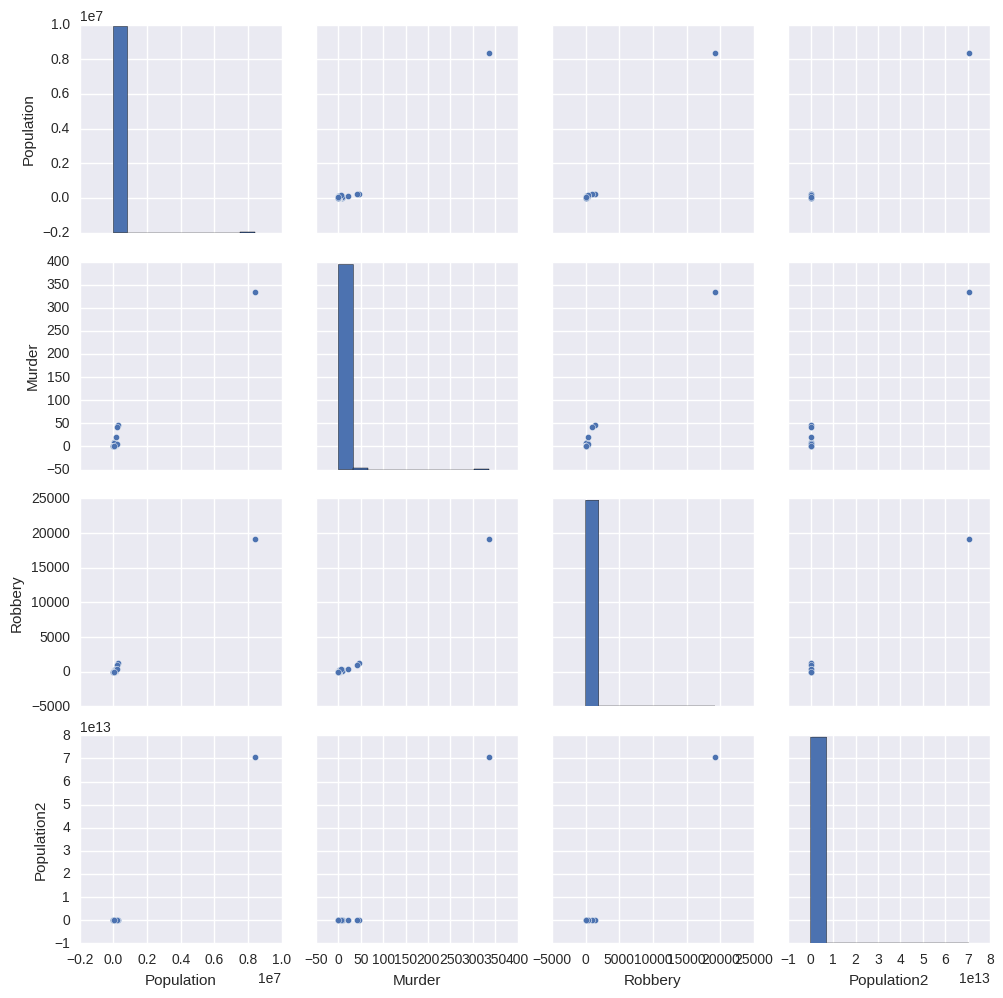

In [22]:
data['Population2'] = np.square(data.Population)
_ = sb.pairplot(data)

Data for New York City is skewing the Feature set for all of the remaining towns and cities in New York State.
The New York City data point will be removed and the data re visualized 

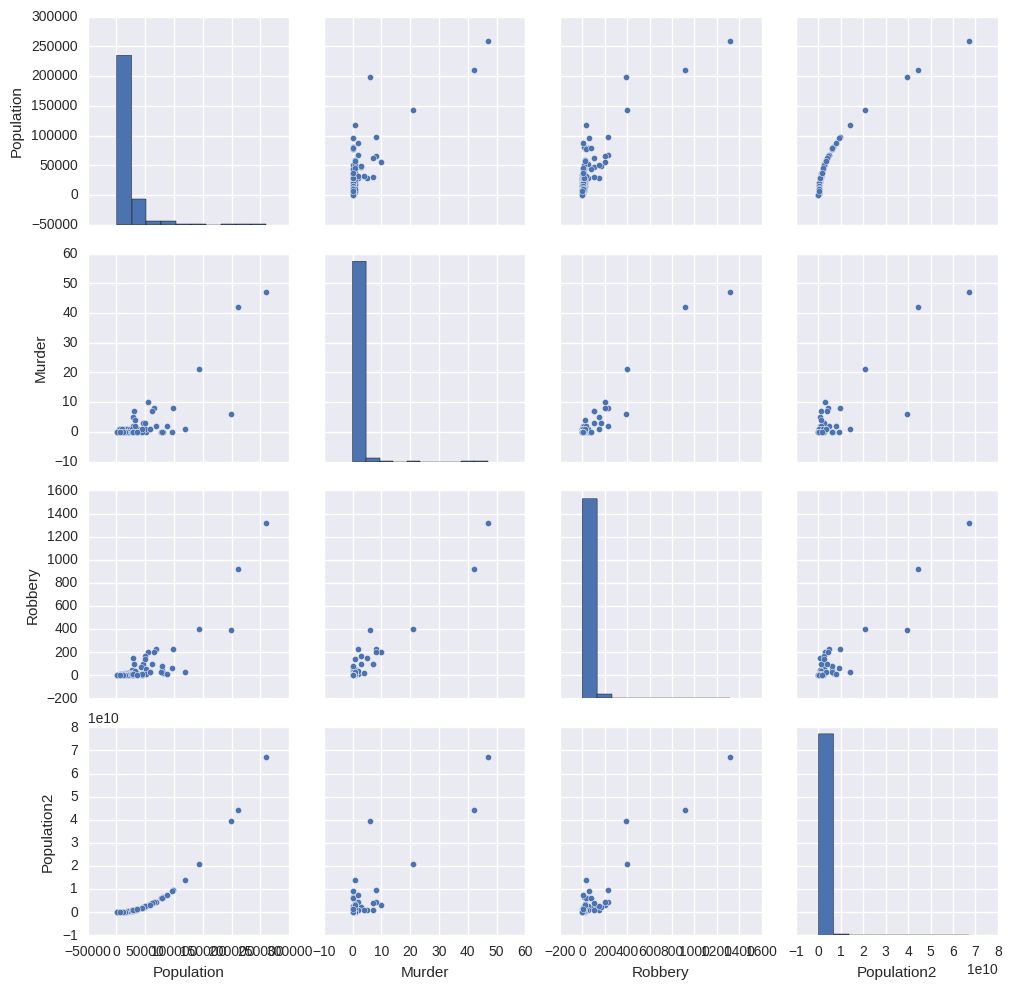

In [23]:
data = data[data.City != "New York"]
_ = sb.pairplot(data)

None of the Features have a distribution close to a normal distribution. Only the population feature will be transformed at this point as the remaining features will be converted to categorical features. 

In [40]:
data["Murder_Cat"] = np.where(data.Murder == 0, 0, 1)
data["Robbery_Cat"] = np.where(data.Robbery == 0, 0, 1)
data.head()

,City,Population,Murder,Robbery,Population2,Murder_Cat,Robbery_Cat
0,Adams Village,1861,0,0,3463321,0,0
1,Addison Town and Village,2577,0,0,6640929,0,0
2,Akron Village,2846,0,0,8099716,0,0
3,Albany,97956,8,227,9595377936,1,1
4,Albion Village,6388,0,4,40806544,0,1
